In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


Inspect Data

In [2]:
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
train_data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
print(data.shape)
data.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Checking for NaN values**

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Filling values with most frequent value**

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
data = pd.DataFrame(imputer.fit_transform(data))
data.columns = train_data.columns
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Counting unique values in columns**

<AxesSubplot:xlabel='type', ylabel='count'>

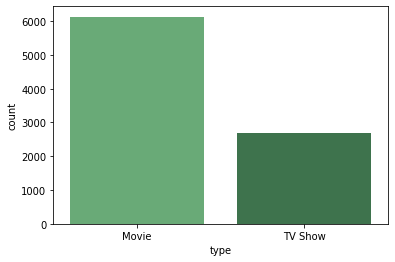

In [7]:
sns.countplot(x = "type",data = data,palette = 'Greens_d')

<AxesSubplot:xlabel='release_year', ylabel='count'>

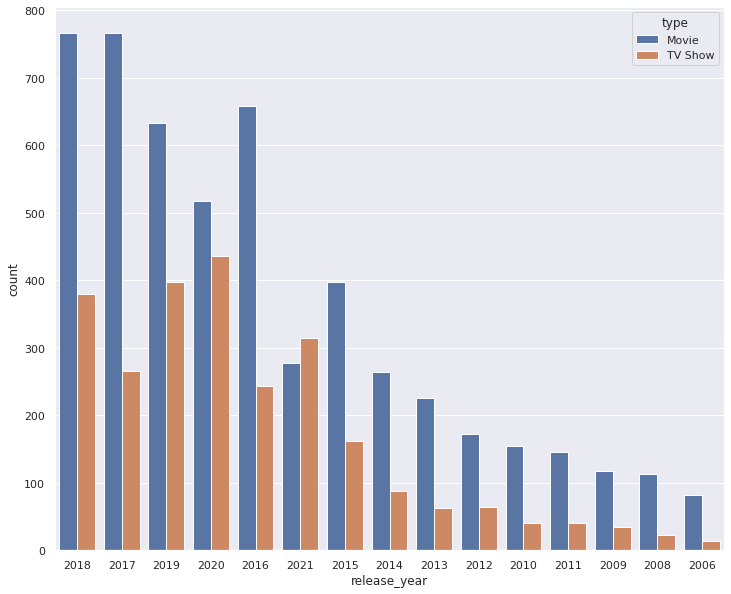

In [8]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x = "release_year",data = data,order = data['release_year'].value_counts().index[0:15], hue = 'type')

<AxesSubplot:xlabel='count', ylabel='rating'>

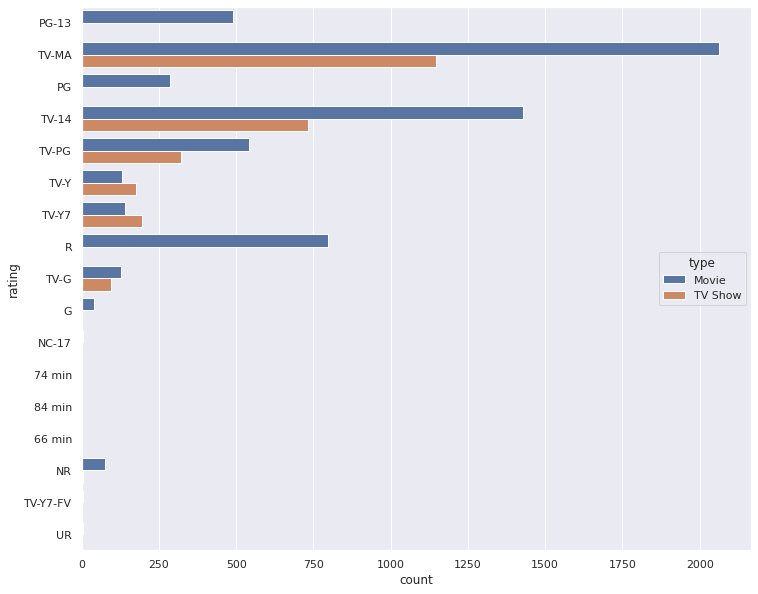

In [9]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y = "rating",data = data, hue = 'type')

**Duration Analysis**

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'
movie_data = data[data.type == 'Movie']
movie_data['duration'] = movie_data['duration'].str.replace(' min','')
movie_data['duration'] = movie_data['duration'].astype(str).astype(int)

movie_data.duration

ValueError: invalid literal for int() with base 10: '1 Season'

In [ ]:
sns.kdeplot(movie_data['duration'])

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
tv_data = data[data.type == 'TV Show']
tv_data['duration'] = tv_data['duration'].str.replace(' Season','')
tv_data['duration'] = tv_data['duration'].str.replace('s','')
tv_data['duration'] = tv_data['duration'].astype(str).astype(int)

tv_data.duration

In [ ]:
sns.kdeplot(tv_data['duration'])

In [ ]:
tv_show = tv_data.loc[:,['title','duration']]
tv_show = tv_show.sort_values(by = 'duration',ascending = False)
top_10 = tv_show[0:11]
top_10.plot(kind='bar',x='title',y='duration', color='purple')

In [ ]:
country_count=data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

In [ ]:
topcountries.plot(kind = 'bar')

In [ ]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
df = netflix_date.groupby('year')['month'].value_counts()

**Recommender**

In [ ]:
def clean_data(x):
    return str.lower(x.replace(' ',''))

In [ ]:
train_data = data.fillna('')
train_data.head()

In [ ]:
features=['title','director','cast','listed_in','description']
train_data = train_data[features]

for feature in features:
    train_data[feature] = train_data[feature].apply(clean_data)

train_data.head()

**Soup of Words**

In [ ]:
def soup_words(x) :
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
train_data['soup'] = train_data.apply(soup_words,axis = 1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(train_data['soup'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
train_data = train_data.reset_index()
indices = pd.Series(train_data.index,index = train_data['title'])
indices

In [ ]:
def get_recommendation(title, cosine_sim = cosine_sim):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores,key = lambda x : x[1],reverse = True )
    
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

In [ ]:
get_recommendation('Peaky Blinders', cosine_sim)

In [ ]:
get_recommendation('Mortel')